In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dropout, Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization
from keras.optimizers import adam_v2
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np

In [22]:
def create_model(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(100,100,1), activation="relu"))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (5, 5), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation="softmax"))
    model.compile(optimizer=adam_v2.Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [25]:
data_gen = ImageDataGenerator(
    preprocessing_function=im_processor.preprocess_img,
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False,
    validation_split=0.1)

batch_size = 32
# train_data = data_gen.flow_from_directory('dataset/', target_size=(100,100), color_mode='grayscale', class_mode='categorical', batch_size=batch_size, subset='training', shuffle=True)
train_data = tf.keras.utils.image_dataset_from_directory(
    'dataset/',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(100,100),
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=True,
)

val_data = tf.keras.utils.image_dataset_from_directory(
    'dataset/',
    image_size=(100,100),
    validation_split=0.2,
    color_mode='grayscale',
    batch_size=batch_size,
    subset='validation',
    shuffle=True,
    seed=123
)

Found 10071 files belonging to 19 classes.
Using 8057 files for training.
Found 10071 files belonging to 19 classes.
Using 2014 files for validation.


In [27]:
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
#                                             patience=3,
#                                             verbose=1,
#                                             factor=0.5,
#                                             min_lr=0.00001)

In [28]:
learning_model = create_model(num_classes=19)

In [58]:
epochs = 15
learning_model.summary()
history = learning_model.fit(train_data,steps_per_epoch=len(train_data)*batch_size//batch_size,validation_data=val_data,validation_steps=len(val_data)*batch_size//batch_size,epochs=epochs)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 96, 96, 32)        832       
                                                                 
 batch_normalization_1 (Batc  (None, 96, 96, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 92, 92, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 46, 46, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 42, 42, 64)       

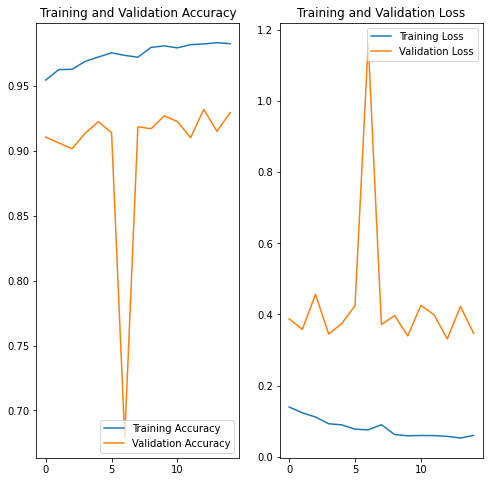

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [65]:
image = tf.keras.preprocessing.image.load_img('6.jpg', color_mode='grayscale')
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
learning_model.predict(input_arr)

array([[2.4197737e-08, 9.9988520e-01, 1.3704108e-08, 8.0795692e-10,
        6.8923451e-05, 1.2947954e-06, 3.6446505e-07, 4.4519907e-06,
        6.6758339e-08, 5.5175756e-06, 1.2004211e-05, 1.8541032e-05,
        1.5502637e-07, 1.0592506e-11, 3.8534560e-07, 4.2102308e-10,
        2.9345797e-06, 1.0396623e-08, 4.7380499e-15]], dtype=float32)